In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plot_utils as u
import scipy.signal as signal
import re

In [38]:
result_dir = Path("beta_modulation/")

In [53]:
ld_on_dir  = result_dir / "ZeroController-20230227165831"
ld_off_dir  = result_dir / "ZeroController-20230227150649"
ld_on_dir_22_threads  = result_dir / "ZeroController-20230227173013"
ld_off_dir_22_threads  = result_dir / "ZeroController-20230227175308"

In [62]:
def plot_beta_and_cortical_modulation(dir, ax, modulation_times, modulation_levels, tstart, tstop):
    tt = np.loadtxt(modulation_times, delimiter=",")
    aa = np.loadtxt(modulation_levels, delimiter=",")
    stt, modulation_signal = u.burst_txt_to_signal(tt, aa, tstart, tstop, 0.01)
    times = np.loadtxt(dir / "controller_sample_times.csv")
    beta = np.loadtxt(dir / "controller_beta_values.csv")
    avg_beta = beta.mean()
    std_beta = beta.std()
    bline = ax.plot(times, beta)
    ax.plot(stt / 1000, 0.0002 * modulation_signal)
    ax.text(5, max(beta) / 2, f'{avg_beta:.2e} +- {std_beta:.2e}', color=bline[0].get_color(), fontsize=13)

Text(0.5, 1.0, 'LD OFF (22 threads)')

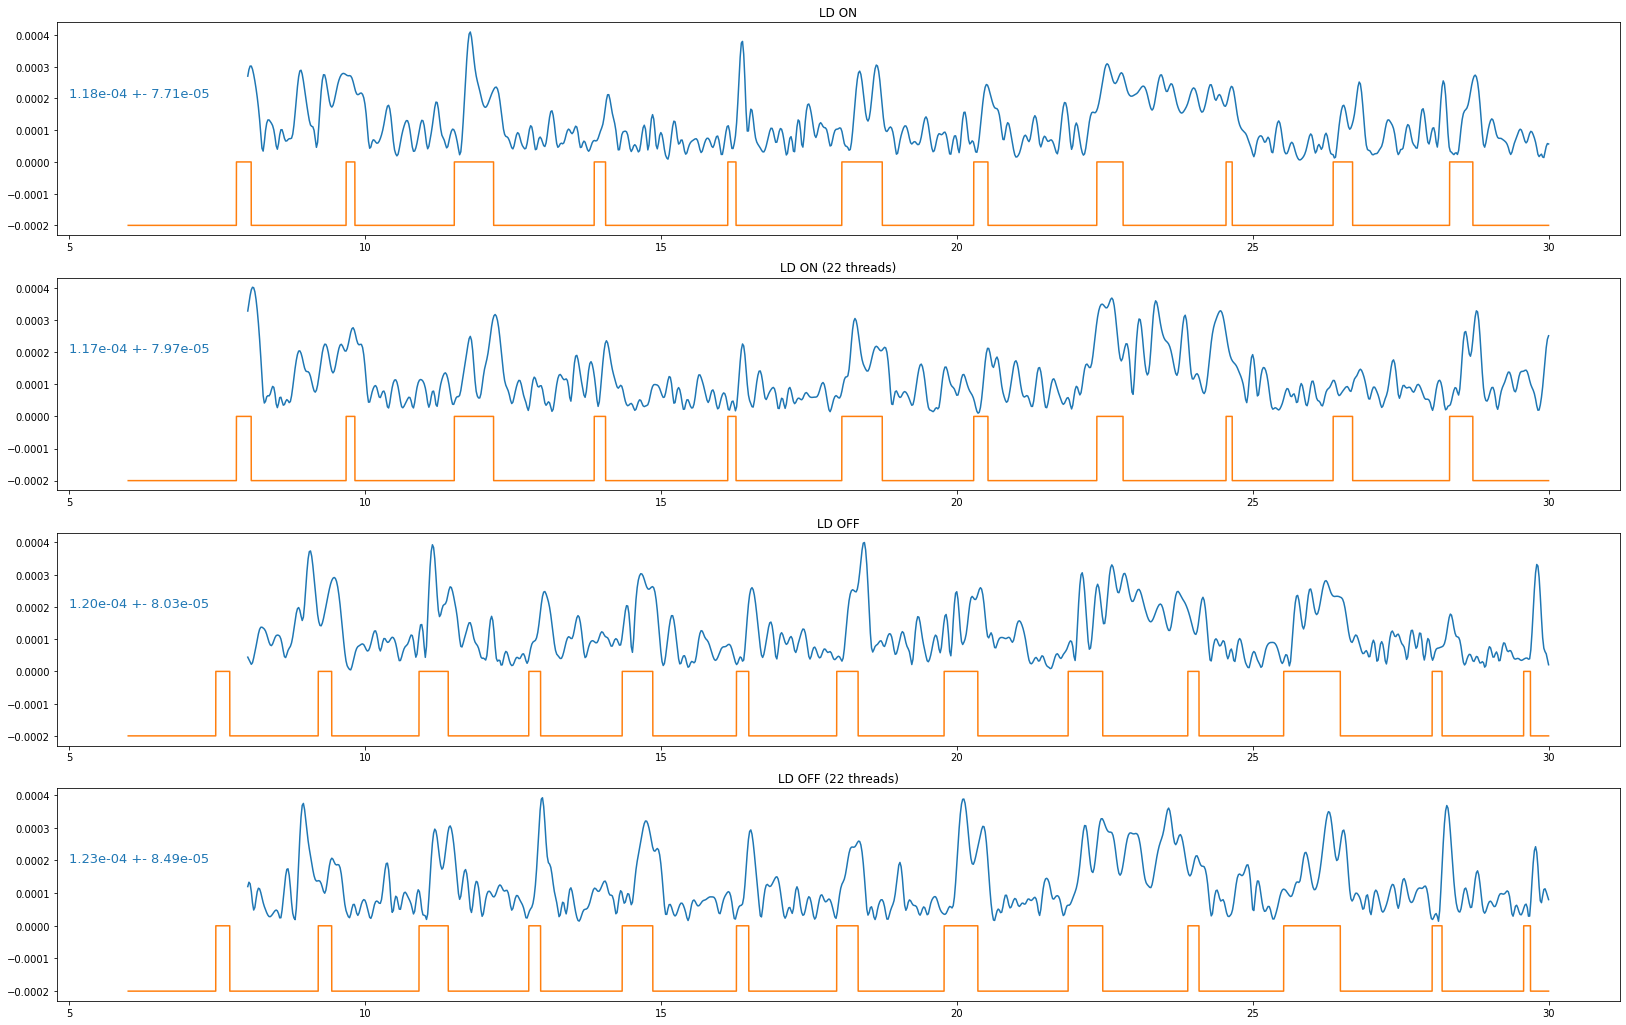

In [64]:
fig, axs = plt.subplots(4, 1, figsize=(28, 18))
plot_beta_and_cortical_modulation(ld_on_dir, axs[0], result_dir / "burst_times_ld_on.txt", result_dir / "burst_level_ld_on.txt", 6000, 30000)
axs[0].set_title('LD ON')

plot_beta_and_cortical_modulation(ld_on_dir_22_threads, axs[1], result_dir / "burst_times_ld_on.txt", result_dir / "burst_level_ld_on.txt", 6000, 30000)
axs[1].set_title('LD ON (22 threads)')

plot_beta_and_cortical_modulation(ld_off_dir, axs[2], result_dir / "burst_times_ld_off.txt", result_dir / "burst_level_ld_off.txt", 6000, 30000)
axs[2].set_title('LD OFF')

plot_beta_and_cortical_modulation(ld_off_dir_22_threads, axs[3], result_dir / "burst_times_ld_off.txt", result_dir / "burst_level_ld_off.txt", 6000, 30000)
axs[3].set_title('LD OFF (22 threads)')
